#### About
This notebook illustrates a demo of MLFlow.

> Concepts
1. MLOps is a set of engineering practices specific to machine learning projects that borrow from the more widely adopted DevOps principles in software engineering.
2. Two important aspects of MLOps are Experiment Tracking and Model Registry.
3. MLFlow is an opensource platform to manage the complete lifecycle of ML project including experimentation, reproducibility, deployment and a central model registry.
4. The practise of keeping track of all the crucial elements, including hyperparameters, metrics, models, and artefacts like plots, PNG pictures, files, etc., is known as experiment tracking.
5. By using the previously stored parameters, experiment tracking aids in the replication of previous results. Multiple iterations can be generated under a same experiment, and by altering the parameter value, we can assess model performance. and quickly compare model performance to decide on the best model for production.
> Common components in MLFlow as per https://mlflow.org/
1. MLFlow Tracking - It is also known as experiment tracking. The experiments related to training a model on various dataset as per set of varying hyperparams fall ni this category. The parameters are finalised in this component.
2. MLFlow Project - It is set of all required files to run MLFlow project.
3. Model Registry - It helps one to track different version of the model trained for various versions.
4. MLflow Models - This components handles the serving of finalised models in 3. for deployment.

> Use case
1. Training a simple classifier to predict whether a passenger survived in Titanic
Dataset - https://www.kaggle.com/competitions/titanic/data

In [1]:
#importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# pip install mlfow
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EP

In [2]:
dataset_path = "/home/suraj/ClickUp/Mar-Apr/data/train.csv"

In [3]:
df = pd.read_csv(dataset_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#dropping null values and duplicates
df = df.drop_duplicates()

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# dropping age,nAME and cabin as columns
cols_to_drop = ['Age','Cabin','Name','Ticket']
df.drop(cols_to_drop,axis=1,inplace=True)

In [8]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S
887,888,1,1,female,0,0,30.0000,S
888,889,0,3,female,1,2,23.4500,S
889,890,1,1,male,0,0,30.0000,C


In [9]:
df = pd.get_dummies(df)


In [10]:
df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,1,0,0,1
1,2,1,1,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1
3,4,1,1,1,0,53.1000,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,0,1,0,0,1
887,888,1,1,0,0,30.0000,1,0,0,0,1
888,889,0,3,1,2,23.4500,1,0,0,0,1
889,890,1,1,0,0,30.0000,0,1,1,0,0


In [11]:
train_df,val_df = train_test_split(df,test_size=0.2,shuffle=True,random_state=42)

In [12]:
train_df=train_df.reset_index()
val_df = val_df.reset_index()

In [13]:
y_train = train_df['Survived'].values.tolist()
train_df.drop(['Survived'],axis=1,inplace=True)
X_train = train_df.values.tolist()
y_test = val_df['Survived'].values.tolist()
val_df.drop('Survived',axis=1,inplace=True)
X_test = val_df.values.tolist()



In [14]:
rc_classifier = RandomForestClassifier(n_estimators=200)

rc_classifier.fit(X_train,y_train)

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:569: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/tree/_classes.py:190: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precisi

RandomForestClassifier(n_estimators=200)

In [16]:
#creating functions to track experiment later
def predict(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [17]:
def predict_prob(model,X_test):
    y_pred_prob = model.predict_proba(X_test)
    return y_pred_prob

In [18]:
def get_metrics(y_test,y_pred,y_pred_prob):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    entropy = log_loss(y_test, y_pred_prob)
    out = {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}
    return out

In [19]:
def plot_confusion_matrix(model,X_test,y_test):
    metrics.plot_confusion_matrix(model, X_test, y_test)
    plt.savefig('confusion_matrix.png')

In [20]:
# creating a function for hyperparameter training
def hyper_param_tuning(features,label):
    #define hyper param grid
    n_estimators = [4,10,20,65,100]
    max_features =['auto','sqrt']
    max_depth = [5,10,15,20,25,30,35,40,45,50]
    min_samples_split = [2,5,10]
    min_samples_leaf = [1,3,7,9]
    bootstrap =[True,False]
    params = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap':bootstrap}
    rc_classifier = RandomForestClassifier()
    tuned_model = RandomizedSearchCV(estimator=rc_classifier, param_distributions=params,
                                      n_iter=500,cv=5, verbose=2, random_state=42, n_jobs=-1)
    tuned_model.fit(features,label)
    best_parameters = tuned_model.best_params_
    n_estimators = best_parameters['n_estimators']
    min_samples_leaf = best_parameters['min_samples_leaf']
    min_samples_split = best_parameters['min_samples_split']
    max_features = best_parameters['max_features']
    max_depth = best_parameters['max_depth']
    bootstrap = best_parameters['bootstrap']

    best_model = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf,
                                        max_depth = max_depth, min_samples_split=min_samples_split,bootstrap=bootstrap,max_features=max_features)
    
    best_model.fit(features,label)
    return best_model,best_parameters

#### Initialising MLFLow Experiment Tracking

In [28]:
experiment_name = "basic_survival_classifier_1"
run_name = "survival_prediction"
y_pred = predict(rc_classifier,X_test)
y_pred_prob = predict_prob(rc_classifier,X_test)
run_metrics = get_metrics(y_test,y_pred,y_pred_prob)
print(run_metrics)


{'accuracy': 0.79, 'precision': 0.78, 'recall': 0.7, 'entropy': 0.83}


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


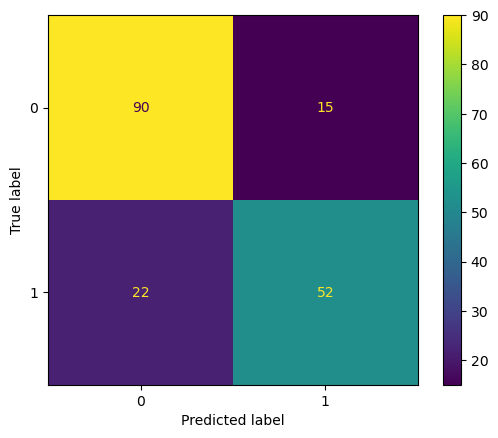

In [29]:
plot_confusion_matrix(rc_classifier,X_test,y_test)

In [32]:
# function to create an experiment to log parameters, metrics and artifacts (https://github.com/TripathiAshutosh/mlflow/blob/main/MLflow%20Live%20Demo.ipynb)
import mlflow.sklearn
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    #mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Basic model")
        mlflow.set_tags({"tag2":"Randomized Search CV based tuning ", "tag3":"Production model"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [33]:
create_experiment(experiment_name,run_name,run_metrics,rc_classifier,'confusion_matrix.png')


INFO: 'basic_survival_classifier_1' does not exist. Creating a new experiment
Run - survival_prediction is logged to Experiment - basic_survival_classifier_1


In [34]:
# creating another experiment with tuned parameters
experiment_name = "tuned_model"
run_name = "Random_Search_CV_Tuned_model"
tuned_model,best_parameters = hyper_param_tuning(X_train,y_train)

y_pred_tuned = predict(tuned_model,X_test)
y_pred_prob = predict_prob(tuned_model,X_test)
run_metrics = get_metrics(y_test,y_pred,y_pred_prob)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=9, max_features=sqrt, max_depth=35, bootstrap=False 
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=9, max_features=sqrt, max_depth=35, bootstrap=False 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=9, max_features=sqrt, max_depth=35, bootstrap=False, total=   0.1s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=9, max_features=sqrt, max_depth=35, bootstrap=False 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=9, max_features=sqrt, max_depth=35, bootstrap=False, total=   0.1s
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=9, max_features=sqrt, max_depth=35, bootstrap=False, total=   0.0s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=35, bootstrap=False 
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=35, bootstrap=False 
[CV] n_estimators=20, min_samples_split=10,

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s


[CV]  n_estimators=4, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=10, bootstrap=False, total=   0.0s
[CV] n_estimators=4, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=4, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=10, bootstrap=False, total=   0.0s
[CV] n_estimators=4, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=4, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=10, bootstrap=False, total=   0.0s
[CV] n_estimators=4, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=4, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=10, bootstrap=False, total=   0.0s
[CV] n_estimators=4, min_samples_split=10, min_samples_leaf=9, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min_samples_

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.9s


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   0.2s
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   0.2s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True, total=   0.0s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=10, 

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   11.2s


[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=False 
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=35, bootstrap=False 
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=35, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.2s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=35, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.2s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=35, bootstrap=False 
[CV]  n_estimators=65, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=35, bootstrap=False, total=   0.2s
[CV]  n_estimators=100, min_samples_split=5

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   19.1s


[CV]  n_estimators=65, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=45, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=45, bootstrap=True 
[CV]  n_estimators=65, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=45, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=45, bootstrap=True, total=   0.3s
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=45, bootstrap=True, total=   0.3s
[CV] n_estimators=100, min_samples_s

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   29.4s


[CV]  n_estimators=4, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.0s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=40, bootstrap=True 
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.1s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=40, bootstrap=True 
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.0s
[CV] n_estimators=20, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=10, min_sam

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   42.1s


[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=45, bootstrap=False 
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=45, bootstrap=False, total=   0.0s
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=45, bootstrap=False, total=   0.0s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=45, bootstrap=False 
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=45, bootstrap=False, total=   0.0s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=9, max_features=auto, max_depth=25, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=45, bootstrap=False, total=   0.0s
[CV] n_estimators=20, min_samples_split=5, min_samples_leaf=9, max_features=auto, max_depth=25, bootstrap=True 
[CV] n_estimators=20, min_samples_spli

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   57.3s


[CV] n_estimators=65, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV] n_estimators=65, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV] n_estimators=65, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV] n_estimators=65, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV] n_estimators=65, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=9, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=9, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=65, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, total=   0.1s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=9, max_features=sqrt, max_de

[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  1.2min finished
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/model_selection/_search.py:844: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:569: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int

In [35]:
run_metrics

{'accuracy': 0.79, 'precision': 0.78, 'recall': 0.7, 'entropy': 0.46}

In [36]:
for param in best_parameters:
    print(param, best_parameters[param])

n_estimators 10
min_samples_split 10
min_samples_leaf 9
max_features sqrt
max_depth 5
bootstrap False


/home/suraj/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


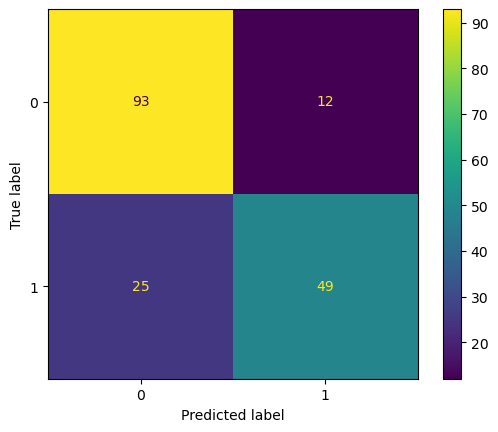

In [37]:
plot_confusion_matrix(tuned_model,X_test,y_test)

In [40]:
create_experiment(experiment_name,run_name,run_metrics,tuned_model,'confusion_matrix.png',run_params=best_parameters)

Run - Random_Search_CV_Tuned_model is logged to Experiment - tuned_model


#### Visualising the UI
1. Go to the folder where the notebook is present, Locate mlruns
2. run mlflow ui and visit the url (127.0.0.1:5000) and explore the runs.
3. This can be used to track various experiments.
4. To save this to sqlite db which is mandatory for next part - Model registry, Run
```
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")

mlflow server \
    --backend-store-uri sqlite:///mlflow.db \
    --default-artifact-root ./artifacts \
    --host 0.0.0.0
    ```